# Qué factores tuvieron más influencia sobre la sobrevivencia de los pasajeros del Titanic?

Algunos módulos no están disposibles a través de la interfaz de Anaconda, y en estos casos se puede hacer una instalacción directa desde el Notebook.

In [1]:
# módulos estándar
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm
import os

In [2]:
# módulos de visualización
import matplotlib.pyplot as plt
import seaborn as sns
#import plotnine as pn
# import plotly.plotly as py

In [3]:
# config Matplotlib
%matplotlib inline
plt.style.use('ggplot')

# config Seaborn
sns.set_theme(color_codes=True)
sns.set_style("darkgrid") # whitegrid

**Contexto**: Usted es un análista de datos en una empresa de seguros, que está revisando si los datos de pasajeros del Titanic podría ayudarle a entender que características ofrecían mejores chances de sobrevivir a este tipo de tragedias.

**Problema**: Entender cuáles factores tuvieron más impacto en la sobrevivencia de los pasajeros del Titanic.

Para realizar su trabajo, utilizará el archivo `.csv` con datos de los pasajeros del Titanic.

In [4]:
# cargar el dataframe con los datos
df = pd.read_csv('titanic.csv')


**1.** Realicemos un EDA ([Exploratory Data Analysis](https://www.itl.nist.gov/div898/handbook/eda/eda.htm)) para comenzar a entender los datos.

In [5]:
# veamos la lista de variables del dataframe (columnas)
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Este es el significado de cada una de las variables del dataframe (o columnas):

|Variable|Significado|Valores|
|---|---|---|
|PassengerId|Identificación del Pasajero|#|
|Survived|Sobrevivió o No?|0=No, 1=Si, vacío=No se sabe|
|Pclass|Clase|1=1ra, 2=2da, 3=3ra|
|Name|Nombre|incluye el Título|
|Sex|Sexo|male, female|
|Age|Edad|en Años|
|SibSp|Hermanos + Conyuge|viaja con hermanos y/o conyuge|
|Parch|Hijos + Padres|viaje con hijos y/o padres|
|Ticket|Número de Tiquete|quienes viajan juntos tienen el mismo tiquete|
|Fare|Tarifa (Costo)|$|
|Cabin|Número de Cabina|indica la Cubierta donde se ubica la Cabina|
|Embarked|Puerto de Embarque|C=Cherbourg, Q=Queenstown, S=Southampton|

In [6]:
df.shape
# qué datos tenemos en el dataframe?
# tenemos caracteristicas que me dan informacion sobre cada pasajero del titanic tenemos datos flotantes y enteros

(1309, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<AxesSubplot:>

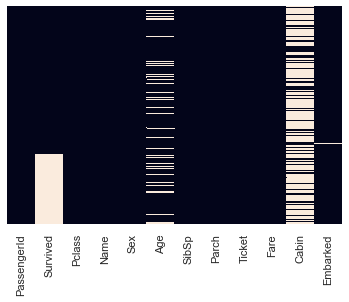

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)  #debo saber que columnas tienen valores nulos
# para esto uso un mapa de calor 

In [9]:

# qué puede decir acerca de los datos en el dataframe?
#El conjunto de datos consta de 1309 observaciones y 12 características.
#De las cuales una es variable dependiente/objetivo (Survived) y el resto 11 son variables independientes: caracteristicas de pasajeros del titanic.
#la columna de variable edad AGE tiene valores nulos / perdidos en total tiene 263 valores nulos perdidos.
#tambien la columna survived  tiene valores nulos ,la columna cabin embarked y fare  tiene un valor nulo el cual
# no se muestra en el mapa de calor (me toco ver el excel jajaja)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ahora utilicemos las herramientas estadísticas básicas para ver que descubrimos:

In [11]:
# agrupemos los sobrevivientes por diferentes variables, y veamos la descripción
df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [12]:
# cálcule algunas medidas estadísticas:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
df.Survived.unique()

array([ 0.,  1., nan])

Hasta ahora qué puede decir acerca de los datos? 

**R/**
La variable objetivo / variable dependiente es de tipo cuantitativa dicotómica  y es Survived


**2.** Continuemos el [EDA](http://analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/) utilizando las herramientas gráficas a nuestra disposición.

<AxesSubplot:>

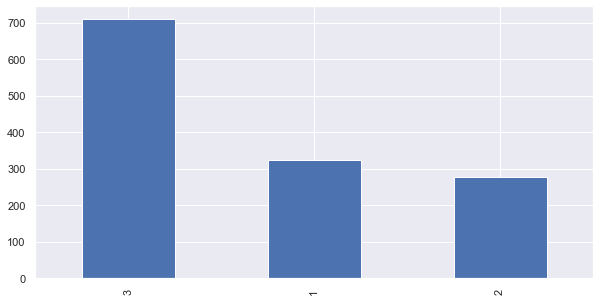

In [14]:
# comencemos con gráficos de barras con la frecuencia de los valores
df['Pclass'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

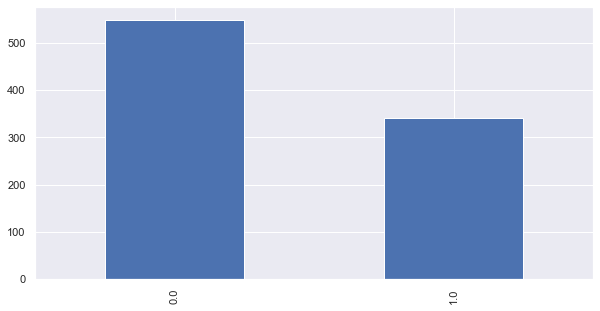

In [15]:
# realice otros gráficos de barras con otras variables:
df['Survived'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

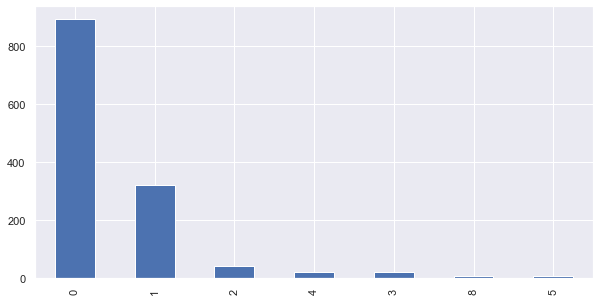

In [16]:
df['SibSp'].value_counts().plot(kind='bar', figsize=(10,5))

Cómo ve las variables hasta el momento, algún _insight_ en particular? 

**R/**


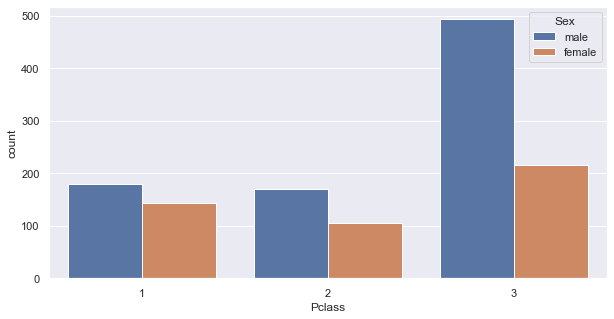

In [17]:
# con los gráficos de barras también es posible cruzar variables:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
g = sns.countplot(ax=ax, data=df, x='Pclass', hue='Sex')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


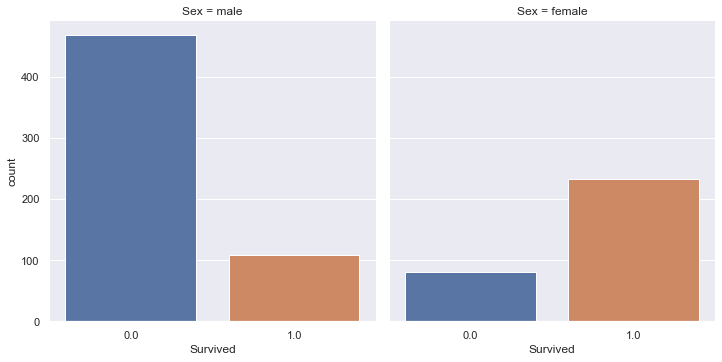

In [18]:
# realice otros gráficos de barras con cruces de variables:
sns.factorplot(x='Survived',col='Sex',kind='count',data=df) #otra forma de cruzar variables

Qué logró entender con los cruces entre variables? 

**R/**
en el segundo grafico se ve como a las mujeres en esa epoca se les daba prioridad para subir a los barcos
por lo que los datos confirman nuestras hipotesis y es que la cantidad de mujeres que sobrevivio fue mayor que la de los hombres
en el primer grafico de barras donde se cruzan variables puedo observar que la pclass 3 tenia mas probabilidad de sobrevivir y esto tambien puede ser porque la clase 3 estaba destinada a personas mas ricas mientras que la pclass1 
eran las victimas con mayor probabilidad de riesgo esto tambien porque esa clase era  mas barata

<AxesSubplot:xlabel='Survived', ylabel='Age'>

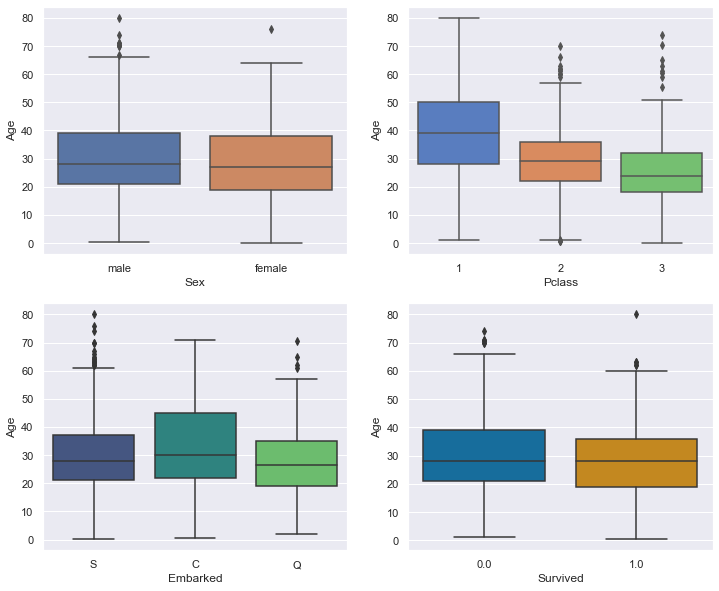

In [19]:
# veamos algunos boxplots de las variables (nos ayudan a identificar outliers)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
sns.boxplot(ax=ax[0,0], data=df, y='Age', x='Sex', palette='deep')
sns.boxplot(ax=ax[0,1], data=df, y='Age', x='Pclass', palette='muted')
sns.boxplot(ax=ax[1,0], data=df, y='Age', x='Embarked', palette='viridis')
sns.boxplot(ax=ax[1,1], data=df, y='Age', x='Survived', palette='colorblind')
# paletas en https://seaborn.pydata.org/tutorial/color_palettes.html

La versión anterior no es muy práctica, refactorice el código para hacerlo más elegante, utilice ciclos por ejemplo.

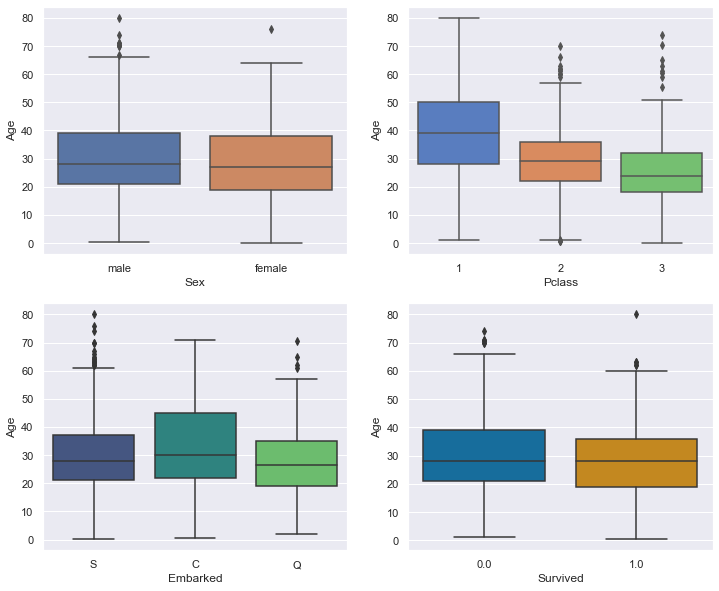

In [20]:
# veamos algunos boxplots de las variables, versión mejorada.
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axis_x = [['Sex','Pclass'],['Embarked','Survived']]
palette =  [['deep','muted'],['viridis','colorblind']]
for i in range(len(axis_x)):
    for j in range(len(axis_x[i])):
        sns.boxplot(ax=ax[i,j], data=df, y='Age', x=axis_x[i][j], palette=palette[i][j])
#con esto sin importar los palette que necesitemos y las variables que querramos en el eje x
# solo debemos agregar las variables en la matriz axis_x  y en palette sus respectivos estilos y se
# realizara la respectiva iteracion de forma dinamica  también podemos cambiar el valor de y parametrizandolo
# para este caso nop porque solo se queria refactorizar el codigo con las lineas que habian creado anteriormente
# y el resultado con el for loop es igual :)

Los _boxplots_ le ayudaron a entender algo más? 

**R/**

las personas de la clase 1 tiene una edad aproximada de 40 la clase 2 aproximadamente 30 y la clase 3 aproximadamente 25


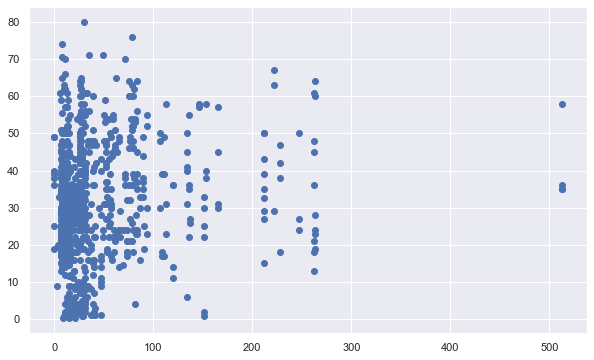

In [21]:
# los scatterplots también son útiles
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Fare'], df['Age'])
plt.show()

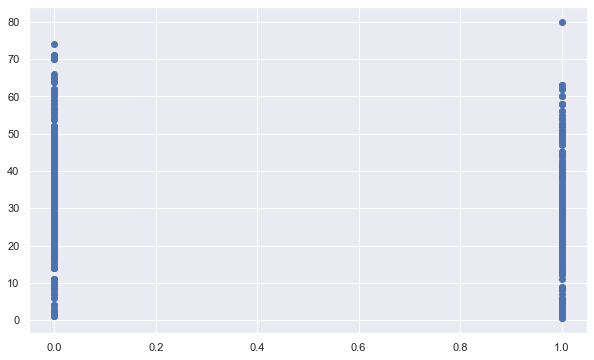

In [22]:
# ensaye con otros scatterpots:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Survived'], df['Age'])
plt.show()

Fueron útiles los _scatterplots_, qué logró entender con ellos? 
**R/**
muy pocas personas pagaron tarifas altas  estando estos algunos entre los 30 y 40 mientras otros entre 40 y 60
entre 0 y 10 un grupo grande pago 50 dolares
tambien la mayoria de las personas entre 20 y 40 es donde notamos la mayor concentracion de datos

<AxesSubplot:xlabel='Age', ylabel='Density'>

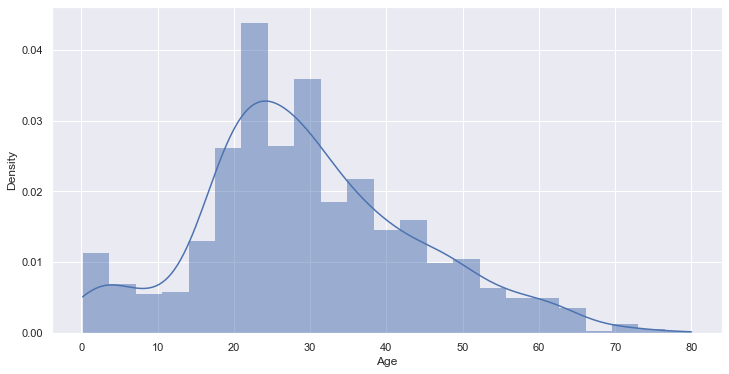

In [23]:
# ahora utilicemos un histograma para entender mejor la distribución de los datos
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(df["Age"].dropna(), ax=ax, kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='Survived', ylabel='Density'>

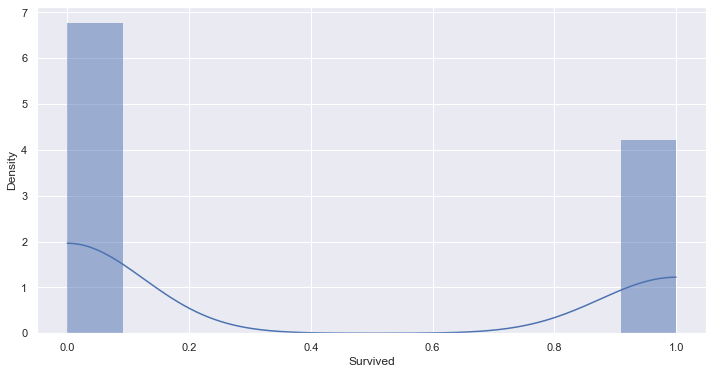

In [24]:
# revise los histogramas/distribuciones de otras variables
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(df["Survived"].dropna(), ax=ax, kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='Sex', ylabel='Density'>

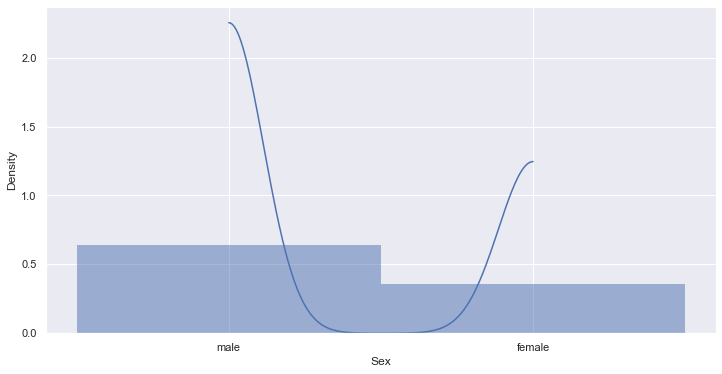

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(df["Sex"].dropna(), ax=ax, kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

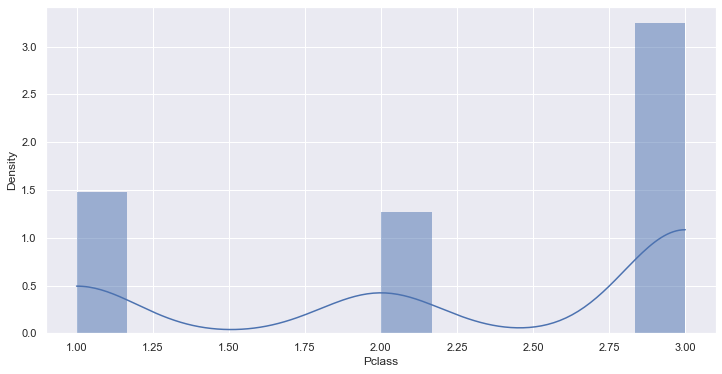

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(df["Pclass"].dropna(), ax=ax, kde=True, stat="density", linewidth=0)

Qué nuevo entendimiento de los datos logró gracias a los histogramas/distribuciones? 

**R/**
existen edades atipicas en los datos se salen mucho de los valores normales 

Es muy usual que los datos no estén completos, veamos cómo están los datos del Titanic y veamos qué hacer al respecto.

<AxesSubplot:>

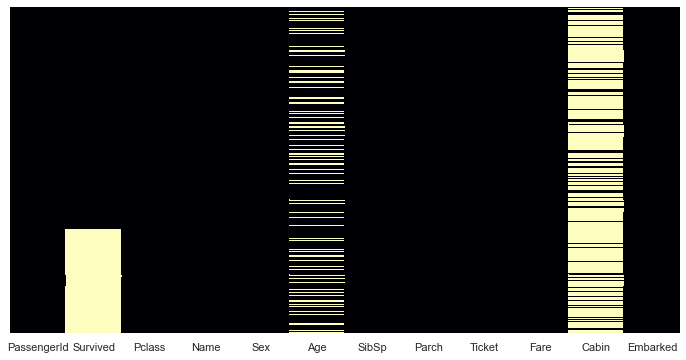

In [27]:
# veamos (usando Seaborn) qué valores que hacen falta
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='magma', ax=ax,yticklabels=False, cbar=False)
# la escala y los valores de y no tiene mucho sentido, puede quitarlos con: yticklabels=False, cbar=False
# para las opciones de cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

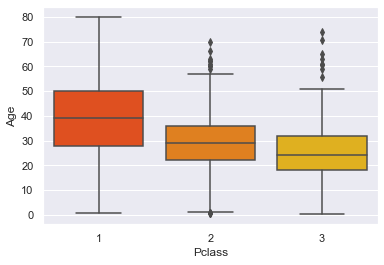

In [28]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='autumn')

Cuál es la mejor estrategia para completar los valores faltantes?

**R/**
como se observa en la celda insertada anteriormente relaciono la variable edad con la clase  ya que habiamos visto que estas tenian relacion
por lo que apartir de este gráfico, podemos encontrar la edad media de cada una de las clases. y estos valores los podriamos usar para llenar los valores faltantes pero esto es distinto a poner el promedio general de edad a todos los valores faltantes ya que aqui lo estamos haciendo por clase 

Cómo se asegura que al adicionar los valores faltantes no se altera _el total_? es decir, se mantienen lo más parecidos a los datos reales.

**R/**
se asegura calculando en el caso de la edad los promedios por clases en vez del total general en todos los valores faltantes

**3.** Antes de completar los datos faltantes, vamos a transformar un poco los datos:
- `Ticket` no es muy útil pero, si se repite nos indica cuantas persona viajan juntas (con el mismo tiquete).
- `Cabin` no dice mucho, pero la primera letra indica la cubierta en la que se encontraba (o desconocida).
- `Sex` podría convertirse a numérica: 0=`female`, 1=`male`
- `Embarked` también puede ser numérica: 0=`Cherbourg`, 1=`Queenstown`, 2=`Southampton`
- `Name` tampoco, pero se puede obtener el título de la persona: señor, señora, señorita, 

**3.1.** `Ticket` → `Contador`

In [29]:
# vamos a contar cuántas veces se repite el mismo tiquete:
df['Contador'] = df.groupby('Ticket')['Ticket'].transform('count')

In [30]:
# veamos el resultado, ordenado por la nueva columna:
df.sort_values(by =['Contador'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
734,735,0.0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S,1
738,739,0.0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S,1
739,740,0.0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S,1
740,741,1.0,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S,11
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,11


In [31]:
# hagamos un conteo:
df['Contador'].value_counts()

1     713
2     264
3     147
4      64
5      35
7      35
6      24
8      16
11     11
Name: Contador, dtype: int64

cuántos pasajeros viajaban solos, y cuántos en grupo? 

**R/**
solos 713  y 596 viajaban en grupo

#cuántos grupos tenían 4 personas y cuántos grupos tenían 7 personas? 

**R/**
16 grupos de 4 personas y 5 grupos de 7 personas

**3.2.** `Cabin` → `Cubierta`

In [32]:
# como tenemos cabinas sin valor, vamos a llenarlas con una X de desconocido
df['Cabin'].fillna("X", inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,X,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,X,S,1


In [33]:
# vamos asignar la Cubierta a partir de la primera letra de 'Cabin'
df['Cubierta'] = df['Cabin'].map(lambda x:x[0])


In [34]:
# hagamos un conteo:
df['Cubierta'].value_counts()

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cubierta, dtype: int64

In [35]:
# diccionario para convertir cada Cubierta en un numero: 'A'=1 .. 'G'=7 ... cualquier otro valor es 8
cubierta = {"A": 1, "B":2,"C":3,"D":4,"E":5,"F":6,"G":7, "X": 8, 'T': 8}
# hagamos la conversión:
df['Cubierta'] = df ['Cubierta'].map(cubierta).astype(int) 

In [36]:
# hagamos un conteo:
df['Cubierta'].value_counts()

8    1015
3      94
2      65
4      46
5      41
1      22
6      21
7       5
Name: Cubierta, dtype: int64

cómo interpreta estos datos? 

**R/**
x y t fueron sumados hasta el momento no sabemos que significa T pero tenemos cuantos grupos estan en cierta cubierta del barco ya que convertimos esto a una variable categorica


**3.3.** `Sex` → `Sex`

In [37]:
# convierta la columna 'Sex' con valores 'female' y 'male', en 0 y 1 respectivamente
sex = {"female": 0, "male": 1}
# hagamos la conversión:
df['Sex'] = df['Sex'].map(lambda x:1 if x == "male" else 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador,Cubierta
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,X,S,1,8
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,3
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,X,S,1,8
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,3
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,X,S,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,X,S,1,8
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,3,3
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S,1,8
1307,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,X,S,1,8


**3.4.** `Embarked` → `Embarked`

In [38]:
# convierta la columna 'Embarked' con valores 0=Cherbourg, 1=Queenstown, 2=Southampton

# hagamos la conversión:
def func(x):
    if x =="C":
        return 0
    if x =="Q":
        return 1
    if x =="S":
        return 2
df['Embarked'] = df['Embarked'].apply(func)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador,Cubierta
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,X,2.0,1,8
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0,2,3
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,X,2.0,1,8
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0,2,3
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,X,2.0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,X,2.0,1,8
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0.0,3,3
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,2.0,1,8
1307,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,X,2.0,1,8


**3.5.** `Name` → `Titulo`

In [39]:
# convierta la columna 'Name' para sacar solo el título de la persona:
# separe por ',', tome el segundo valor, y separe luego por '.' para sacar el primer valor, quite los espacios:
df['Titulo'] = df['Name'].apply(lambda n: n.split(',')[1].split('.')[0].strip())


In [40]:
# hagamos un conteo:
df['Titulo'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Sir               1
Don               1
the Countess      1
Dona              1
Jonkheer          1
Capt              1
Lady              1
Mme               1
Name: Titulo, dtype: int64

Hay demasiados Titulos, vamos reducirlos a `Mr`, `Mrs`, `Miss` y `Otro`. Para estos debemos ver cuales corresponde a títulos masculinos y cuales a femeninos.

In [41]:
# creemos una tabla cruzada de 'Titulo' por 'Sex'
pd.crosstab(df['Titulo'], df['Sex'])

Sex,0,1
Titulo,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


Vamos a convertir: `Master` a `Mr` (Señor), `the Countess` y `Mme` a `Mrs` (Señora), `Lady`, `Mlle` y `Ms` a `Miss` (Señorita), y los demás a `Otro`.

In [42]:
# creemos las listas para las sustituciones:
lst_Mr = ['Master']
lst_Mrs = ['the Countess', 'Mme','Dona']
lst_Miss = ['Lady','Mlle','Ms']
lst_Otro = ['Capt','Col','Don','Jonkheer','Dr','Major','Rev','Sir']
# cambiemos los títulos:
df['Titulo'] = df['Titulo'].replace(lst_Mr, 'Mr')
df['Titulo'] = df['Titulo'].replace(lst_Mrs, 'Mrs')
df['Titulo'] = df['Titulo'].replace(lst_Miss, 'Miss')
df['Titulo'] = df['Titulo'].replace(lst_Otro, 'Otro')

In [43]:
# ahora convertimos los títulos a valores numéricos: 0='Mr', 1='Mrs', 2='Miss', 3='Otro'
def func(x):
    if x =="Mr":
        return 0
    if x =="Mrs":
        return 1
    if x =="Miss":
        return 2
    if x =="Otro":
        return 3
df['Titulo'] = df['Titulo'].apply(func)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador,Cubierta,Titulo
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,X,2.0,1,8,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0,2,3,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,X,2.0,1,8,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0,2,3,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,X,2.0,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,X,2.0,1,8,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0.0,3,3,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,2.0,1,8,0
1307,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,X,2.0,1,8,0


**4.** Vamos a completar los datos faltantes:

In [44]:
# Cuántos datos hacen falta en la columna Age?
df['Age'].isnull().sum()

263

Cúal es la estrategia para completar los datos de la edad? 

**R/**
como se observa en la celda insertada posteriormente  relaciono la variable edad con la clase ya que habiamos visto que estas tenian relacion por lo que apartir de este gráfico, podemos encontrar la edad media de cada una de las clases. y estos valores los podriamos usar para llenar los valores faltantes pero esto es distinto a poner el promedio general de edad a todos los valores faltantes ya que aqui lo estamos haciendo por clase

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

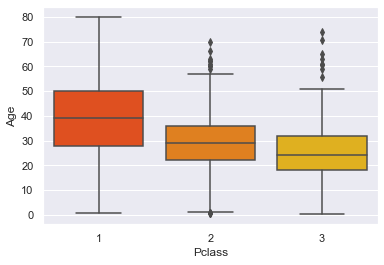

In [45]:
# completemos los datos de la edad:
sns.boxplot(x='Pclass',y='Age',data=df,palette='autumn')


In [58]:
df['Age'].isnull().sum()

0

In [59]:
# Cuántos datos hacen falta en la columna Cabin?
#clase 1 promedio aproximado 40 clase 2 30 clase 3 25
df.loc[df.Age.isna() & df.Pclass.isin(["female"]), 'Age'] = 28.687088
df.loc[df.Age.isna() & df.Pclass.isin(["female"]), 'Age'] = 28.687088

#df.loc[df.Age.isna() & df.Pclass.isin([2]), 'Age'] = 30
#df.loc[df.Age.isna() & df.Pclass.isin([3]), 'Age'] = 25
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Contador,Cubierta,Titulo
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,2.0,1,8,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,0.0,2,3,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,1,8,2
3,4,1.0,1,0,35.0,1,0,113803,53.1000,2.0,2,3,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,2.0,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,25.0,0,0,A.5. 3236,8.0500,2.0,1,8,0
1305,1306,NaN,1,0,39.0,0,0,PC 17758,108.9000,0.0,3,3,1
1306,1307,NaN,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2.0,1,8,0
1307,1308,NaN,3,1,25.0,0,0,359309,8.0500,2.0,1,8,0


Pero ya no estamos usando `Cabin`, en la conversión a `Cubierta`, ya no tenemos datos faltantes:

<AxesSubplot:>

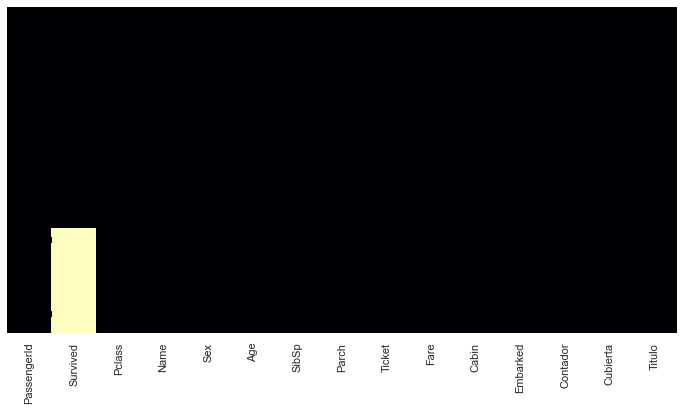

In [47]:
# verifique si hay datos faltates en la columna Cubierta?

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='magma', ax=ax,yticklabels=False, cbar=False)
#cubierta no tiene valores faltantes ya que anteriormente los llenamos con unos indicadores de diccionario

In [48]:
# Cuántos datos hacen falta en la columna Embarked?
df["Embarked"].isnull().sum()

2

Cúal es la estrategia para completar los datos del puerto de embarque? 

**R/**
Tomar los datos de la mayor poblacion del puerto de embarque

In [49]:
# completemos los datos de Embarked:
df["Embarked"].value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [50]:
# así quedaron los datos:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Contador,Cubierta,Titulo
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,X,2.0,1,8,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0,2,3,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,X,2.0,1,8,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0,2,3,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,X,2.0,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,25.0,0,0,A.5. 3236,8.0500,X,2.0,1,8,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0.0,3,3,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,2.0,1,8,0
1307,1308,NaN,3,"Ware, Mr. Frederick",1,25.0,0,0,359309,8.0500,X,2.0,1,8,0


Después de la conversión de valores, y completar los faltantes, hay columnas que no necesitamos.

In [51]:
# Elimina la columnas que no son necesarias:
del df['Name']
del df['Cabin']
#en este caso cabina no cree una columna nueva lo hice sobre la existente   y el nombre si se puede eliminar
# ya que lo reemplace por el titulo haciendo el split   

In [52]:
# así quedaron los datos:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Contador,Cubierta,Titulo
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,2.0,1,8,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,0.0,2,3,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,1,8,2
3,4,1.0,1,0,35.0,1,0,113803,53.1000,2.0,2,3,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,2.0,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,25.0,0,0,A.5. 3236,8.0500,2.0,1,8,0
1305,1306,NaN,1,0,39.0,0,0,PC 17758,108.9000,0.0,3,3,1
1306,1307,NaN,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2.0,1,8,0
1307,1308,NaN,3,1,25.0,0,0,359309,8.0500,2.0,1,8,0


**5.** Ahora si, a analizar los datos.

In [53]:
# veamos la supervivencia de acuerdo a la edad
dftemp = df.groupby('Survived')['Age']
dftemp.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,29.846084,12.762731,1.00,23.0,25.0,37.00,74.0
1.0,342.0,28.507807,14.005080,0.42,21.0,27.0,36.75,80.0


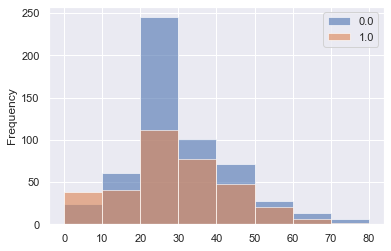

In [54]:
ax1, ax2 = dftemp.plot(kind='hist', legend=True, alpha=0.6, bins=range(0, 90, 10))
#ax1.legend(['No', 'Yes'], title='Survived', loc='upper right')

In [55]:
# veamos la supervivencia según el genero
df.groupby('Survived')['Sex'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,0.852459,0.354968,0.0,1.0,1.0,1.0,1.0
1.0,342.0,0.318713,0.466660,0.0,0.0,0.0,1.0,1.0


Complete el análisis ...

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Embarked     1307 non-null   float64
 10  Contador     1309 non-null   int64  
 11  Cubierta     1309 non-null   int32  
 12  Titulo       1309 non-null   int64  
dtypes: float64(4), int32(1), int64(7), object(1)
memory usage: 128.0+ KB


In [57]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Contador,Cubierta,Titulo
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,2.0,1,8,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,0.0,2,3,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,1,8,2
3,4,1.0,1,0,35.0,1,0,113803,53.1000,2.0,2,3,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,2.0,1,8,0


Qué puede concluir?

**R/**
Survived es una característica categórica con valores 0 o 1.
Alrededor del 38% de las muestras sobrevivieron 
La mayoría de los pasajeros > 75% no viajaron con padres o hijos.
Casi el 30% de los pasajeros tenían hermanos y/o cónyuge a bordo.
Las tarifas variaron significativamente y pocos pasajeros <1% pagaron hasta $512 dolares.
hubieron Pocos pasajeros de edad avanzada <1% con edades comprendidas entre los 65 y los 80 años.